Dataset of students having information regarding whether a student has an alcohol problem, behvioural problem, family problem, etc. 

Data stored in health_data.csv and obtained from https://github.com/sshumiye/Notes/blob/master/health_data.csv.

Our goal is to group students with similar characteristics into an appropriate number of clusters.

# Need for clustering :
Once we group students with similar characteristics into clusters, we can then approach that cluster and then apply the interventions we need to help them out.

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn

import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('whitegrid')

# Getting and Cleaning Data

In [5]:
path = "C:\\Users\\Ritesh Mohan Monga\\Documents\\Python-ML\\health_data.csv"
data = pd.read_csv(path)
data.head()

,BIO_SEX,age,TREG1,ALCEVR1,ALCPROBS1,marever1,cocever1,inhever1,cigavail,DEP1,ESTEEM1,VIOL1,PASSIST,DEVIANT1,SCHCONN1,GPA1,EXPEL1,FAMCONCT,PARACTV,PARPRES
0,2.0,NaN,0.0,1.0,2,1,0,0,0.0,10.0,47.0,4.0,0,5.0,NaN,NaN,0.0,24.3,8.0,15.0
1,2.0,19.427397,1.0,1.0,1,0,0,0,1.0,17.0,35.0,1.0,0,5.0,22.0,2.333333,0.0,23.3,9.0,15.0
2,1.0,NaN,0.0,0.0,0,0,0,0,0.0,2.0,45.0,0.0,0,1.0,30.0,2.250000,0.0,24.3,3.0,15.0
3,1.0,20.430137,1.0,0.0,0,1,1,1,1.0,19.0,47.0,4.0,1,4.0,19.0,2.000000,0.0,18.7,6.0,14.0
4,2.0,NaN,0.0,1.0,0,0,0,0,0.0,6.0,39.0,0.0,0,5.0,32.0,3.000000,0.0,20.0,9.0,6.0


In [6]:
# few missing values are observed
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6504 entries, 0 to 6503
Data columns (total 20 columns):
BIO_SEX      6503 non-null float64
age          4837 non-null float64
TREG1        6500 non-null float64
ALCEVR1      6444 non-null float64
ALCPROBS1    6504 non-null int64
marever1     6504 non-null int64
cocever1     6504 non-null int64
inhever1     6504 non-null int64
cigavail     6444 non-null float64
DEP1         6486 non-null float64
ESTEEM1      6483 non-null float64
VIOL1        6454 non-null float64
PASSIST      6504 non-null int64
DEVIANT1     6448 non-null float64
SCHCONN1     6368 non-null float64
GPA1         6274 non-null float64
EXPEL1       6486 non-null float64
FAMCONCT     6504 non-null float64
PARACTV      6477 non-null float64
PARPRES      6369 non-null float64
dtypes: float64(15), int64(5)
memory usage: 1016.3 KB


In [7]:
# number of rows different for each column due to missing values

In [8]:
data.columns = map(str.upper, data.columns)

In [9]:
data = data.dropna()

In [10]:
data.head()

,BIO_SEX,AGE,TREG1,ALCEVR1,ALCPROBS1,MAREVER1,COCEVER1,INHEVER1,CIGAVAIL,DEP1,ESTEEM1,VIOL1,PASSIST,DEVIANT1,SCHCONN1,GPA1,EXPEL1,FAMCONCT,PARACTV,PARPRES
1,2.0,19.427397,1.0,1.0,1,0,0,0,1.0,17.0,35.0,1.0,0,5.0,22.0,2.333333,0.0,23.3,9.0,15.0
3,1.0,20.430137,1.0,0.0,0,1,1,1,1.0,19.0,47.0,4.0,1,4.0,19.0,2.000000,0.0,18.7,6.0,14.0
5,1.0,14.509589,0.0,0.0,0,0,0,0,0.0,8.0,41.0,3.0,0,0.0,27.0,2.666667,0.0,23.7,3.0,13.0
6,1.0,13.676712,0.0,0.0,0,0,0,0,1.0,4.0,42.0,5.0,0,7.0,18.0,2.500000,0.0,24.7,6.0,13.0
7,1.0,15.178082,1.0,1.0,0,1,0,0,1.0,4.0,40.0,8.0,1,6.0,20.0,1.500000,0.0,22.3,10.0,14.0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4601 entries, 1 to 6502
Data columns (total 20 columns):
BIO_SEX      4601 non-null float64
AGE          4601 non-null float64
TREG1        4601 non-null float64
ALCEVR1      4601 non-null float64
ALCPROBS1    4601 non-null int64
MAREVER1     4601 non-null int64
COCEVER1     4601 non-null int64
INHEVER1     4601 non-null int64
CIGAVAIL     4601 non-null float64
DEP1         4601 non-null float64
ESTEEM1      4601 non-null float64
VIOL1        4601 non-null float64
PASSIST      4601 non-null int64
DEVIANT1     4601 non-null float64
SCHCONN1     4601 non-null float64
GPA1         4601 non-null float64
EXPEL1       4601 non-null float64
FAMCONCT     4601 non-null float64
PARACTV      4601 non-null float64
PARPRES      4601 non-null float64
dtypes: float64(15), int64(5)
memory usage: 754.9 KB


# Scaling Data Before Clustering

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [15]:
# We woll consider the following clustering variables
cluster = data[['ALCEVR1', 'MAREVER1', 'ALCPROBS1', 'DEVIANT1', 'VIOL1',
            'DEP1', 'ESTEEM1', 'SCHCONN1', 'PARACTV', 'PARPRES', 'FAMCONCT']]

In [ ]:
# standarding the cluster variables so that mean = 0, sd = 1

In [16]:
cluster_s = cluster.copy()

In [17]:
cluster_s['ALCEVR1'] = preprocessing.scale(cluster_s['ALCEVR1'].astype('float64'))
cluster_s['MAREVER1'] = preprocessing.scale(cluster_s['MAREVER1'].astype('float64'))
cluster_s['ALCPROBS1'] = preprocessing.scale(cluster_s['ALCPROBS1'].astype('float64'))
cluster_s['DEVIANT1'] = preprocessing.scale(cluster_s['DEVIANT1'].astype('float64'))
cluster_s['VIOL1'] = preprocessing.scale(cluster_s['VIOL1'].astype('float64'))
cluster_s['DEP1'] = preprocessing.scale(cluster_s['DEP1'].astype('float64'))
cluster_s['ESTEEM1'] = preprocessing.scale(cluster_s['ESTEEM1'].astype('float64'))
cluster_s['SCHCONN1'] = preprocessing.scale(cluster_s['SCHCONN1'].astype('float64'))
cluster_s['PARACTV'] = preprocessing.scale(cluster_s['PARACTV'].astype('float64'))
cluster_s['PARPRES'] = preprocessing.scale(cluster_s['PARPRES'].astype('float64'))
cluster_s['FAMCONCT'] = preprocessing.scale(cluster_s['FAMCONCT'].astype('float64'))


# K Means Cluster Analysis for 1 to 10 clusters

In [19]:
cluster_train, cluster_test = train_test_split(cluster_s, test_size = 0.3, random_state = 222)
print (cluster_train.shape, cluster_test.shape)

(3220, 11) (1381, 11)


In [42]:
# import cdist to calculate Euclidean Distance
from scipy.spatial.distance import cdist

In [43]:
clusters = range(1,11)
mean_dist = []

In [45]:
# creating a model for each cluster
for k in clusters:
    model = KMeans(n_clusters = k)
    model.fit(cluster_train)
    mean_dist.append(sum(np.min(cdist(cluster_train, model.cluster_centers_, 'euclidean'),
                                axis = 1))/cluster_train.shape[0]) # average minimum distance
print(mean_dist)

[3.093610139011614, 2.7823693973762005, 2.6196128073064404, 2.531866266913655, 2.4473957469643643, 2.3723586717833904, 2.331181295044008, 2.284732874447762, 2.241510334039397, 2.2104059305648]


In [32]:
cluster_train.shape[0]

3220

# Plotting Elbow Curve 

Text(0.5, 1.0, 'Elbow method for k values')

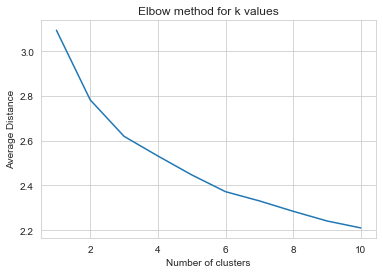

In [46]:
plt.plot(clusters, mean_dist)
plt.xlabel('Number of clusters')
plt.ylabel('Average Distance')
plt.title('Elbow method for k values')

In [47]:
# plot shows decrease in average minimum distance of the observations from the cluster sets
# we want to choose the minimum number of clusters that provides us a low averade distance
# we look for a 'bend' in elbow curve, that's where the average distance value might be levelling off 
# such that adding more clusters will not decrease the average distance that much.

# bends observed at k = 2, 3, 6
# main bends at k = 2 and k = 3, we'll consider these two cases

# Canonical discriminate analysis 

To determine which is the better fit out  of k = 2 or k = 3, we can use a scatterplot. With 11 clustering variables we'll have 11 dimensions, so it's impossile to visualize on scatterplot. Hence we use Canonical Discriminate Analysis. It's a data reduction technique which creates a smaller number of
variables that are linear combinations of the 11 clustering variables. Those new variables are called canonical variables and they are ordered in terms of proportion of the variance. So the first canonical variable accounts for the largest proportion of the variance, second variable accounts for second-largest, and so on. In most cases, majority is accounted for by the first two canonical variables and we will also consider only them for our plot.
PCA(Principal Component Analysis) method allows us to do this.

- k=3, 3 clusters :

In [48]:
model1 = KMeans(n_clusters = 3)
model1.fit(cluster_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

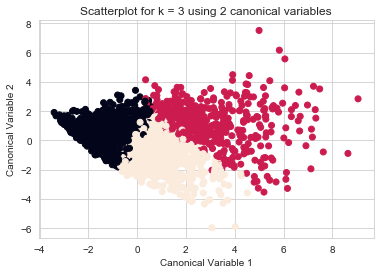

In [50]:
from sklearn.decomposition import PCA

pca_2 = PCA(2) # we just need the first two canonical variables
plt.figure()
plot_columns = pca_2.fit_transform(cluster_train) 
plt.scatter(x = plot_columns[:,0], y = plot_columns[:,1], c = model1.labels_,)
plt.xlabel('Canonical Variable 1')
plt.ylabel('Canonical Variable 2')
plt.title('Scatterplot for k = 3 using 2 canonical variables')
plt.show()


In [51]:
# 3 clusters are densely packed
# observations are highly correlated with each other
# within each cluster, variance is relativelly low
# overlap between clusters
# red cluster is spread out, less correlation between observations withim

- k=2, 2 clusters :

In [53]:
model2 = KMeans(n_clusters = 2)
model2.fit(cluster_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

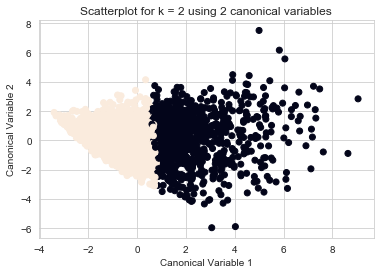

In [54]:
pca_2 = PCA(2) 
plt.figure()
plot_columns = pca_2.fit_transform(cluster_train) 
plt.scatter(x = plot_columns[:,0], y = plot_columns[:,1], c = model2.labels_,)
plt.xlabel('Canonical Variable 1')
plt.ylabel('Canonical Variable 2')
plt.title('Scatterplot for k = 2 using 2 canonical variables')
plt.show()

In [ ]:
# two distinct clusters, densely packed, high correlation
# variance relatively low within each cluster
# some overlap observed
# black cluster more spread out, higher variance

# better solution than k = 3, because less overlap, cluster variance low

- k = 6, 6 clusters :

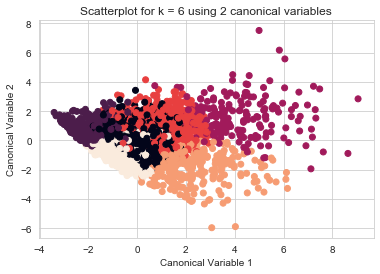

In [55]:
model3 = KMeans(n_clusters = 6)
model3.fit(cluster_train)

pca_2 = PCA(2) 
plt.figure()
plot_columns = pca_2.fit_transform(cluster_train) 
plt.scatter(x = plot_columns[:,0], y = plot_columns[:,1], c = model3.labels_,)
plt.xlabel('Canonical Variable 1')
plt.ylabel('Canonical Variable 2')
plt.title('Scatterplot for k = 6 using 2 canonical variables')
plt.show()

In [56]:
# lot of overlap, not a good choice

# Conclusion
- 2 cluster solution will provide a better fit for our problem.
- After clustering, group the student population into 2 clusters, then evaluate each cluster and find what are the common characteristics. Based on those characteristics, we can intervene and provide solutions for them.